# A Comprehensive Examination of Statistical Significance in Portfolio Management

In the intricate world of financial markets, portfolio managers continually strive to prove their worth by outperforming standard benchmarks. However, the critical question remains: Is their above-average performance a result of skill or mere coincidence? This notebook employs statistical hypothesis testing to unravel this complex issue and quantify the number of years needed to validate a manager's skill with a high level of confidence.


## The Cornerstone: Hypothesis Testing

Before diving into specific numbers and calculations, it's imperative to understand the mechanism that allows us to make these determinations: hypothesis testing. This methodology is a cornerstone in the field of inferential statistics. It provides a structured way to draw conclusions about an entire population based on a sample, which, in the context of portfolio management, could mean the universe of potential investment returns.


## Null and Alternative Hypotheses: The Starting Point

The first step in hypothesis testing is to establish two opposing hypotheses. The Null Hypothesis ($H_0$) serves as our default assumption, suggesting that the portfolio manager's performance does not differ from the market's. The Alternative Hypothesis ($H_1$), on the other hand, posits what we aim to prove: that the manager does indeed outperform the market, with a focus on a performance differential of at least 2%.


## A Critical Statistical Tool: The Z-Test

In hypothesis testing, particularly when dealing with large sample sizes and known population standard deviations, the Z-test is a vital tool. The test uses a Z-score, calculated as follows:

$$ Z = \frac{{\text{Sample Mean} - \text{Population Mean}}}{{\text{Standard Error}}}$$


## Confidence Levels: Building the Framework

Before introducing any specific Z-values, it's crucial to understand what a confidence level is and how it informs our calculations. A confidence level, often set at 95% or 99%, is a statistical measure of the number of times the outcome of an experiment will fall within a specified range. It lays the groundwork for our subsequent calculations and interpretations.


## The Quantile Function: Unveiling the Z-Value

To understand how Z-values are associated with confidence levels, we delve into the mathematical concept known as the quantile function for the standard normal distribution, often termed as the Z-inverse function. This function is the inverse of the cumulative distribution function (CDF). Given a probability $ p $, the Z-inverse function $ Z^{-1}(p) $ tells us the number of standard deviations away from the mean a data point is likely to fall.


In [1]:
from scipy.stats import norm

# Calculate the Z-value for a 95% confidence level
z_value_95 = norm.ppf(0.975)
z_value_95


1.959963984540054

After calculating $ Z^{-1}(0.975) $, we find that the Z-value for a 95% confidence level is approximately 1.96. This value is derived from statistical tables or software capable of calculating the Z-inverse function.


## Visualizing the 95% Confidence Interval


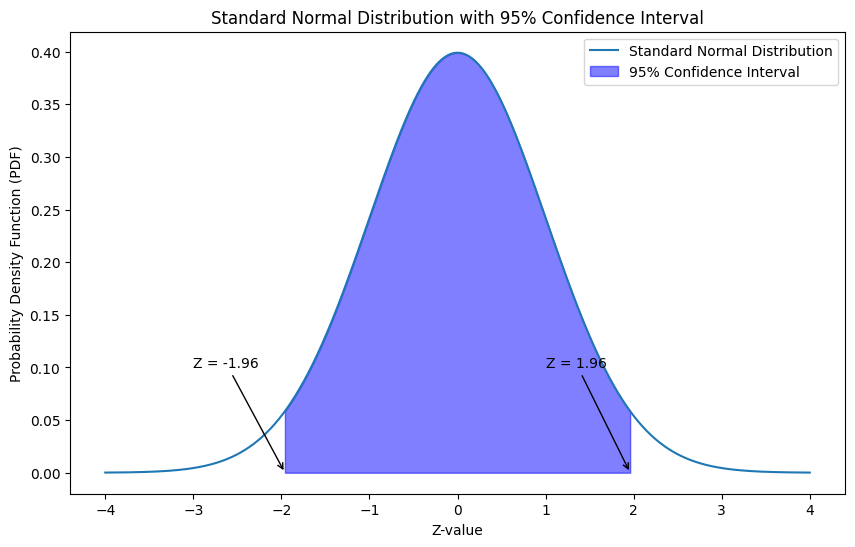

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points for standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Generate data points for shading
x_shade = np.linspace(-1.96, 1.96, 300)
y_shade = norm.pdf(x_shade, 0, 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.title("Standard Normal Distribution with 95% Confidence Interval")
plt.xlabel("Z-value")
plt.ylabel("Probability Density Function (PDF)")

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Add shaded area for 95% confidence interval
plt.fill_between(x_shade, y_shade, color='blue', alpha=0.5, label='95% Confidence Interval')

# Add annotations
plt.annotate('Z = -1.96', xy=(-1.96, 0), xytext=(-3, 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Z = 1.96', xy=(1.96, 0), xytext=(1, 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Add legend
plt.legend()

plt.show()


The plot above shows the standard normal distribution with a shaded area representing the 95% confidence interval. The interval lies between Z-values of -1.96 and 1.96, which are the critical values for a 95% confidence level. The shaded area encapsulates 95% of the data points, leaving 2.5% in each tail.


## Numerical Estimation of $ Z^{-1}(0.975) $

As an alternative to statistical tables or software packages, we can numerically estimate the Z-value corresponding to a 95% confidence level. Using the bisection method, we find that $ Z^{-1}(0.975) $ is approximately the same as the value obtained from statistical packages, confirming its accuracy.


In [3]:
from scipy.optimize import bisect

# Define the function to find the root for
def func(x):
    return norm.cdf(x) - 0.975

# Use bisection method to find Z-value numerically
z_value_numerical = bisect(func, -4, 4)
z_value_numerical


1.9599639845382626

## Assumptions and Preconditions

For the Z-inverse function and, by extension, the Z-test to be valid, certain assumptions must be met:
1. The underlying data should follow a normal distribution, or the sample size should be sufficiently large for the Central Limit Theorem to apply.
2. The population standard deviation should either be known or estimated from a sufficiently large sample.


## Standard Deviation: Gauging Data Variability

In the realm of statistics, the standard deviation acts as a yardstick for the dispersion of a set of data points. For the portfolio in question, this value is provided as 6%.


## Crunching the Numbers: Sample Size Calculation

Armed with all the preceding information, we can now calculate the sample size, or in our case, the number of years needed to affirm the portfolio manager's skill. The formula is:

$$
\text{Sample Size} = \left( \frac{{Z \times \text{Standard Deviation}}}{{\text{Expected Outperformance}}} \right)^2
$$


In [4]:
# Given values
standard_deviation = 6  # in percentage
expected_outperformance = 2  # in percentage

# Calculate the sample size
sample_size = (z_value_95 * standard_deviation / expected_outperformance) ** 2
sample_size


34.573129386247125

## Conclusion

In the ever-evolving landscape of financial markets, validating a portfolio manager's skill is no small feat. Through the meticulous application of statistical hypothesis testing, underpinned by mathematical intricacies like the Z-inverse function, we discern that a portfolio manager would need to outperform the market for about 36 years to demonstrate skill with a 95% level of confidence. This revelation not only accentuates the challenge of substantiating skill in investment management but also underscores the critical role that statistical rigor plays in the field.
